In [3]:
import sys
print(sys.executable)


e:\Anaconda3\envs\telco-churn\python.exe


# Customer Churn Prediction in Telecom

## 1. Dataset Overview


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
pd.set_option("display.max_columns", None)


In [6]:

df=pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\Telco_Customer_\telco-churn-e2e\data\raw\telco_churn.csv')
print("Shape:", df.shape)


Shape: (7043, 21)


In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# Count blank strings
blank_count = (df["TotalCharges"].astype(str).str.strip() == "").sum()
print("Blank strings in TotalCharges:", blank_count)

# Show some rows where blank exists
df[df["TotalCharges"].astype(str).str.strip() == ""].head()


Blank strings in TotalCharges: 11


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [10]:
# Convert to numeric (blank strings will become NaN)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Check missing after conversion
print("Missing values in TotalCharges:", df["TotalCharges"].isna().sum())

df[df["TotalCharges"].isna()].head()


Missing values in TotalCharges: 11


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No


In [11]:
df.loc[df["TotalCharges"].isna(), "TotalCharges"] = 0

print("Remaining missing in TotalCharges:", df["TotalCharges"].isna().sum())


Remaining missing in TotalCharges: 0


In [12]:
# Drop identifier column
df = df.drop(columns=["customerID"])

# Create target (1 = churn, 0 = not churn)
df["Churn"] = (df["Churn"] == "Yes").astype(int)

# Quick check
print(df["Churn"].value_counts())
print("Churn rate (%):", round(df["Churn"].mean() * 100, 2))

df.head()


Churn
0    5174
1    1869
Name: count, dtype: int64
Churn rate (%): 26.54


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [13]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

print("Numerical Columns:", num_cols)
print("\nCategorical Columns:", cat_cols)
print("\nCount → Numerical:", len(num_cols), "Categorical:", len(cat_cols))


Numerical Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

Categorical Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Count → Numerical: 5 Categorical: 15


In [14]:
num_cols.remove("Churn")

print("Final Numerical Columns:", num_cols)
print("Final Categorical Columns:", cat_cols)


Final Numerical Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Final Categorical Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [15]:
contract_churn = (
    df.groupby("Contract")["Churn"]
    .mean()
    .sort_values(ascending=False)
)

print(contract_churn)


Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn, dtype: float64


In [16]:
df.groupby("Contract")["Churn"].value_counts(normalize=True)


Contract        Churn
Month-to-month  0        0.572903
                1        0.427097
One year        0        0.887305
                1        0.112695
Two year        0        0.971681
                1        0.028319
Name: proportion, dtype: float64

In [17]:
internet_churn = (
    df.groupby("InternetService")["Churn"]
    .mean()
    .sort_values(ascending=False)
)

print(internet_churn)


InternetService
Fiber optic    0.418928
DSL            0.189591
No             0.074050
Name: Churn, dtype: float64


In [18]:
df.groupby("InternetService")["Churn"].value_counts(normalize=True)


InternetService  Churn
DSL              0        0.810409
                 1        0.189591
Fiber optic      0        0.581072
                 1        0.418928
No               0        0.925950
                 1        0.074050
Name: proportion, dtype: float64

In [19]:
df.groupby("PaymentMethod")["Churn"].mean().sort_values(ascending=False)


PaymentMethod
Electronic check             0.452854
Mailed check                 0.191067
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Name: Churn, dtype: float64

In [20]:
df.groupby("Churn")["tenure"].mean()


Churn
0    37.569965
1    17.979133
Name: tenure, dtype: float64

In [21]:
df.groupby("Churn")["tenure"].describe()


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
1,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


In [22]:
df.groupby("Churn")["MonthlyCharges"].mean()


Churn
0    61.265124
1    74.441332
Name: MonthlyCharges, dtype: float64

In [23]:
df.groupby("Churn")["TotalCharges"].mean()


Churn
0    2549.911442
1    1531.796094
Name: TotalCharges, dtype: float64

In [24]:
df.groupby("SeniorCitizen")["Churn"].mean()


SeniorCitizen
0    0.236062
1    0.416813
Name: Churn, dtype: float64

In [25]:
df.groupby("Contract")["Churn"].agg(["count", "mean"])


,count,mean
Contract,,
Month-to-month,3875,0.427097
One year,1473,0.112695
Two year,1695,0.028319


In [26]:
X = df.drop(columns=["Churn"])
y = df["Churn"]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (7043, 19)
y shape: (7043,)


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Train churn rate:", y_train.mean())
print("Test churn rate:", y_test.mean())


Train shape: (5634, 19)
Test shape: (1409, 19)
Train churn rate: 0.2653532126375577
Test churn rate: 0.2654364797728886


In [28]:
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object"]).columns.tolist()

print("Numerical:", num_cols)
print("Categorical:", cat_cols)


Numerical: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=2000))
])

print("Pipeline ready.")


Pipeline ready.


In [30]:
clf.fit(X_train, y_train)
print("Baseline Logistic Regression trained ✅")


Baseline Logistic Regression trained ✅


In [31]:
from sklearn.metrics import (
    roc_auc_score, classification_report, confusion_matrix
)

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print("ROC-AUC:", round(roc_auc_score(y_test, y_proba), 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


ROC-AUC: 0.8423

Confusion Matrix:
 [[927 108]
 [165 209]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [32]:
import numpy as np

threshold = 0.35  # try lower threshold

y_pred_new = (y_proba >= threshold).astype(int)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_new))
print("\nClassification Report:\n", classification_report(y_test, y_pred_new))


Confusion Matrix:
 [[813 222]
 [110 264]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83      1035
           1       0.54      0.71      0.61       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.76      0.77      1409



In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

rf_model.fit(X_train, y_train)

print("Random Forest trained ✅")


Random Forest trained ✅


In [34]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

rf_pred = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:, 1]

print("ROC-AUC:", round(roc_auc_score(y_test, rf_proba), 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))


ROC-AUC: 0.8212

Confusion Matrix:
 [[925 110]
 [192 182]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409



In [35]:
from xgboost import XGBClassifier

xgb_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        eval_metric="logloss",
        use_label_encoder=False
    ))
])

xgb_model.fit(X_train, y_train)

print("XGBoost trained ✅")


XGBoost trained ✅


In [36]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

xgb_pred = xgb_model.predict(X_test)
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

print("ROC-AUC:", round(roc_auc_score(y_test, xgb_proba), 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("\nClassification Report:\n", classification_report(y_test, xgb_pred))


ROC-AUC: 0.8419

Confusion Matrix:
 [[929 106]
 [178 196]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [37]:
# Get feature names after preprocessing
preprocessor_fitted = clf.named_steps["preprocessor"]

# Get numerical feature names
num_features = num_cols

# Get categorical feature names after one-hot encoding
cat_features = (
    preprocessor_fitted
    .named_transformers_["cat"]
    .named_steps["onehot"]
    .get_feature_names_out(cat_cols)
)

# Combine all feature names
all_features = np.concatenate([num_features, cat_features])

print("Total features after encoding:", len(all_features))


Total features after encoding: 45


In [38]:
# Get model coefficients
coefficients = clf.named_steps["model"].coef_[0]

# Create DataFrame for feature importance
feature_importance = pd.DataFrame({
    "Feature": all_features,
    "Coefficient": coefficients
})

# Sort by absolute importance
feature_importance["Abs_Coefficient"] = feature_importance["Coefficient"].abs()
feature_importance = feature_importance.sort_values(
    by="Abs_Coefficient",
    ascending=False
)

feature_importance.head(15)


,Feature,Coefficient,Abs_Coefficient
16,InternetService_Fiber optic,0.805547,0.805547
36,Contract_Month-to-month,0.690025,0.690025
38,Contract_Two year,-0.643589,0.643589
15,InternetService_DSL,-0.564001,0.564001
32,StreamingTV_Yes,0.345146,0.345146
35,StreamingMovies_Yes,0.344361,0.344361
43,PaymentMethod_Electronic check,0.286841,0.286841
18,OnlineSecurity_No,0.276548,0.276548
27,TechSupport_No,0.251874,0.251874
14,MultipleLines_Yes,0.225190,0.225190


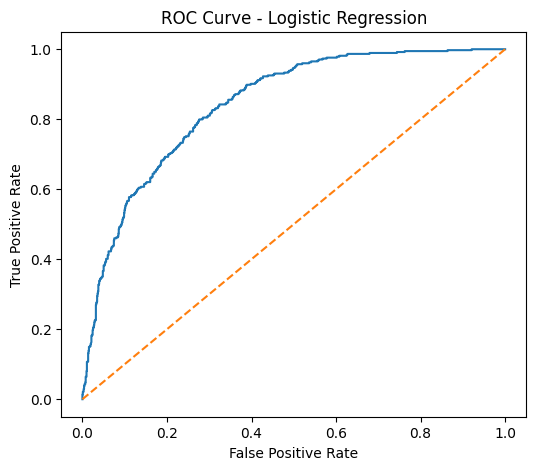

In [39]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.show()


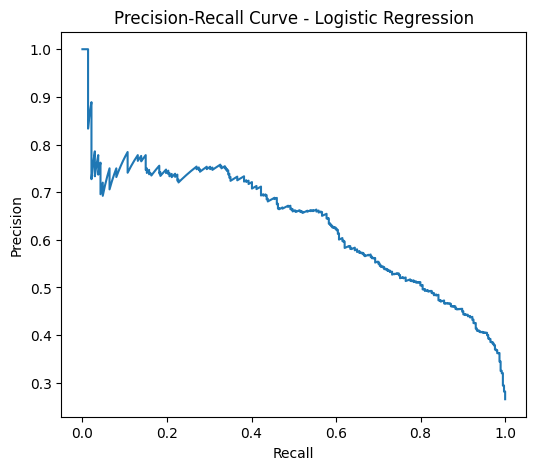

In [40]:
from sklearn.metrics import precision_recall_curve

precision, recall, pr_thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6,5))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Logistic Regression")
plt.show()


In [41]:
import joblib
import os

os.makedirs("../models", exist_ok=True)
joblib.dump(clf, "../models/churn_pipeline.joblib")

print("Saved -> ../models/churn_pipeline.joblib")


Saved -> ../models/churn_pipeline.joblib
